In [1]:
import sys
sys.path.append('/Users/reketejmakrety/Documents/projects/multistate_dynamical_processes_networks')
import numpy as np
import matplotlib.pyplot as plt
from multistate_processes.barabasi_albert import BarabasiAlbert
from multistate_processes.process import MultistateProcess
from multistate_processes.simulate import SimulateProcess
from multistate_processes.meanField import MeanField

In [2]:
N = 100
n = 2
num_positive_spins = 60
T = 200

network = BarabasiAlbert(N, 2)

rate_matrix = np.array([
    ['0', 'r*{1}/N'], 
    ['r*{0}/N', '0'], 
])

voter_model = MultistateProcess(rate_matrix, N=N, r=2*np.log(2))

states = [0] * N
positivie_nodes = np.random.choice(list(range(N)), num_positive_spins).tolist()

for i in positivie_nodes:
    states[i] = 1

voter = SimulateProcess(network, voter_model, T, states)

In [3]:
S = np.zeros(T)
X = np.zeros((T, n, int(network.k_max)))

S[0] = num_positive_spins

degrees = network.degrees_list
for node in range(N):
    X[0][states[node]][degrees[node] - 1] += 1

iterate_voter = iter(voter)
X = np.nan_to_num(X / np.sum(X[0], axis=0))

mean_field = MeanField(network, voter_model, T, X)

calculate_mean_field = iter(mean_field)
for i in range(1, T):
    next(calculate_mean_field)
    s = next(iterate_voter)
    S[i] = np.sum(s)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


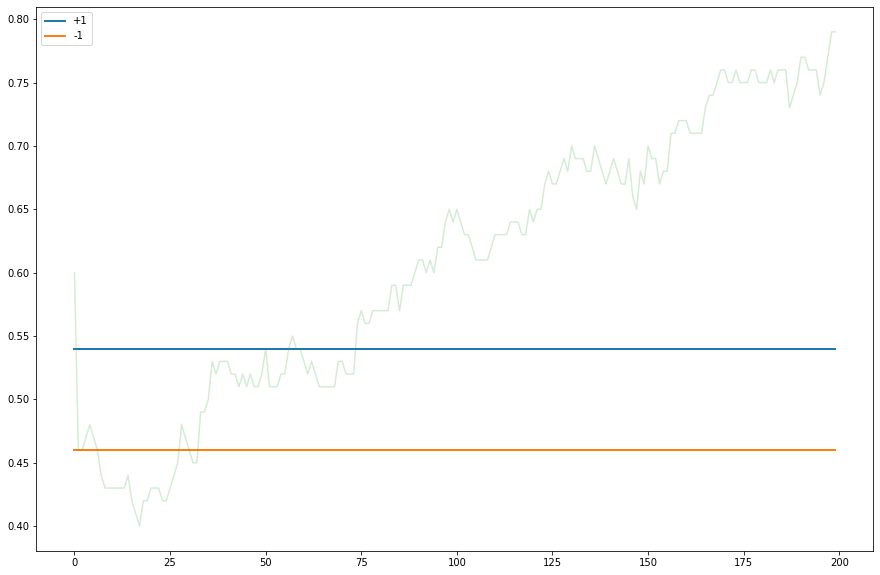

In [11]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(T), mean_field.rho(calculate_mean_field.x), linewidth=2)
plt.plot(np.arange(T), S / N, alpha=0.2)
plt.legend(['+1', '-1'])
plt.show()